In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Datasets
train_df = pd.read_csv(r"C:\Users\philp\Downloads\train.csv")
test_df = pd.read_csv(r"C:\Users\philp\Downloads\test_Vges7qu (1).csv")
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()


Train shape: (550068, 12)
Test shape: (233599, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## EDA

In [3]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
print("\n=== Missing Values in Train ===")
print(train_df.isnull().sum())


=== Missing Values in Train ===
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


#Handing Missing Values

In [6]:

for col in ['Product_Category_2', 'Product_Category_3']:
    train_df[col] = train_df[col].fillna(-999)
    test_df[col] = test_df[col].fillna(-999)



print("Missing values after filling:")
print(train_df.isnull().sum())


Missing values after filling:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Comb                        233599 non-null  object 
 1   User_ID                     233599 non-null  int64  
 2   Product_ID                  233599 non-null  object 
 3   Gender                      233599 non-null  object 
 4   Age                         233599 non-null  object 
 5   Occupation                  233599 non-null  int64  
 6   City_Category               233599 non-null  object 
 7   Stay_In_Current_City_Years  233599 non-null  object 
 8   Marital_Status              233599 non-null  int64  
 9   Product_Category_1          233599 non-null  int64  
 10  Product_Category_2          233599 non-null  float64
 11  Product_Category_3          233599 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 21.4+ MB


## Checking Duplicates

In [9]:

print("Duplicates in train:", train_df.duplicated().sum())
print("Duplicates in test:", test_df.duplicated().sum())

# Remove duplicates if any
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

print("New Train shape:", train_df.shape)
print("New Test shape:", test_df.shape)


Duplicates in train: 0
Duplicates in test: 0
New Train shape: (550068, 12)
New Test shape: (233599, 12)


## Outlier Detection

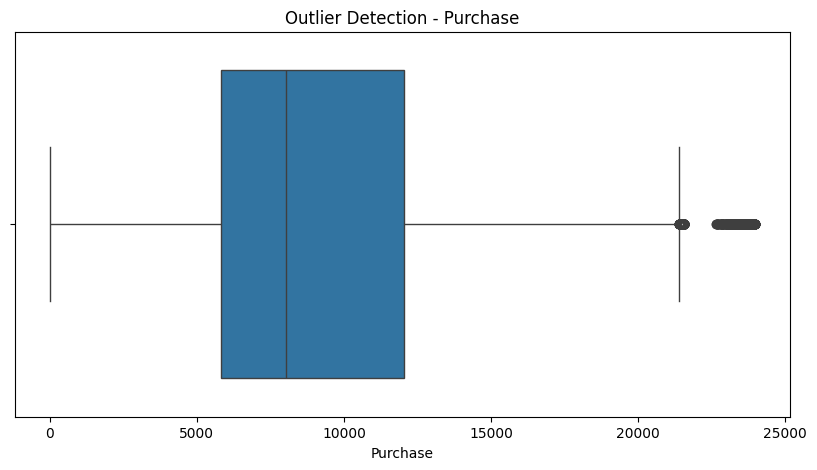

99th percentile value: 20665.0


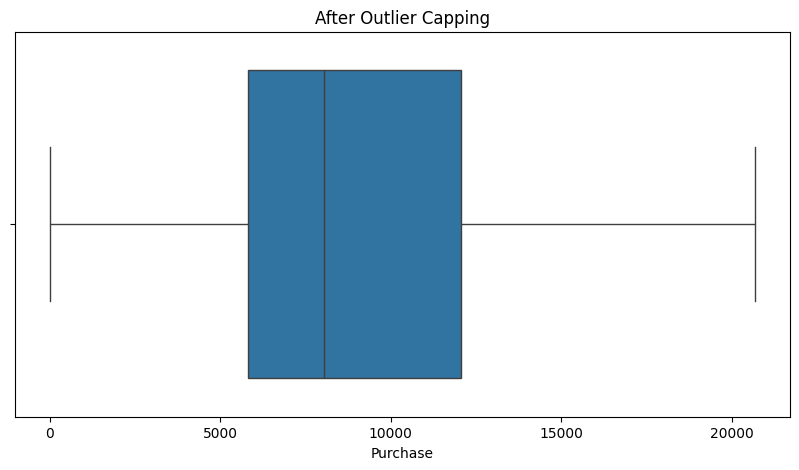

In [10]:


import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Purchase column
plt.figure(figsize=(10,5))
sns.boxplot(x=train_df['Purchase'])
plt.title("Outlier Detection - Purchase")
plt.show()

# Optional: Cap purchases at the 99th percentile
upper_limit = train_df['Purchase'].quantile(0.99)
print("99th percentile value:", upper_limit)

train_df['Purchase'] = train_df['Purchase'].clip(upper=upper_limit)

# Verify again
plt.figure(figsize=(10,5))
sns.boxplot(x=train_df['Purchase'])
plt.title("After Outlier Capping")
plt.show()


## Encode Categorical Variables


In [11]:


# Gender -> binary
train_df['Gender'] = train_df['Gender'].map({'M': 0, 'F': 1})
test_df['Gender'] = test_df['Gender'].map({'M': 0, 'F': 1})

# Age -> ordinal mapping
age_map = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
train_df['Age'] = train_df['Age'].map(age_map)
test_df['Age'] = test_df['Age'].map(age_map)

# Stay in city -> convert '4+' to 4, then integer
train_df['Stay_In_Current_City_Years'] = train_df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)
test_df['Stay_In_Current_City_Years'] = test_df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)

# City_Category -> one-hot encoding
train_df = pd.get_dummies(train_df, columns=['City_Category'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['City_Category'], drop_first=True)

print("Train shape after encoding:", train_df.shape)
print("Test shape after encoding:", test_df.shape)


Train shape after encoding: (550068, 13)
Test shape after encoding: (233599, 13)


## Feature Scaling

In [12]:


from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

# Initialize scaler
scaler = StandardScaler()

# Fit on train and transform both
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

print("Scaling complete.")
train_df.head()


Scaling complete.


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1000001,P00069042,1,0,0.294864,2,0,-0.610809,-1.472320,-0.659752,8370,False,False
1,1000001,P00248942,1,0,0.294864,2,0,-1.118912,0.670951,1.518548,15200,False,False
2,1000001,P00087842,1,0,0.294864,2,0,1.675656,-1.472320,-0.659752,1422,False,False
3,1000001,P00085442,1,0,0.294864,2,0,1.675656,0.688012,-0.659752,1057,False,False
4,1000002,P00285442,0,6,1.214734,4,0,0.659449,-1.472320,-0.659752,7969,False,True


#Correlation Heatmap

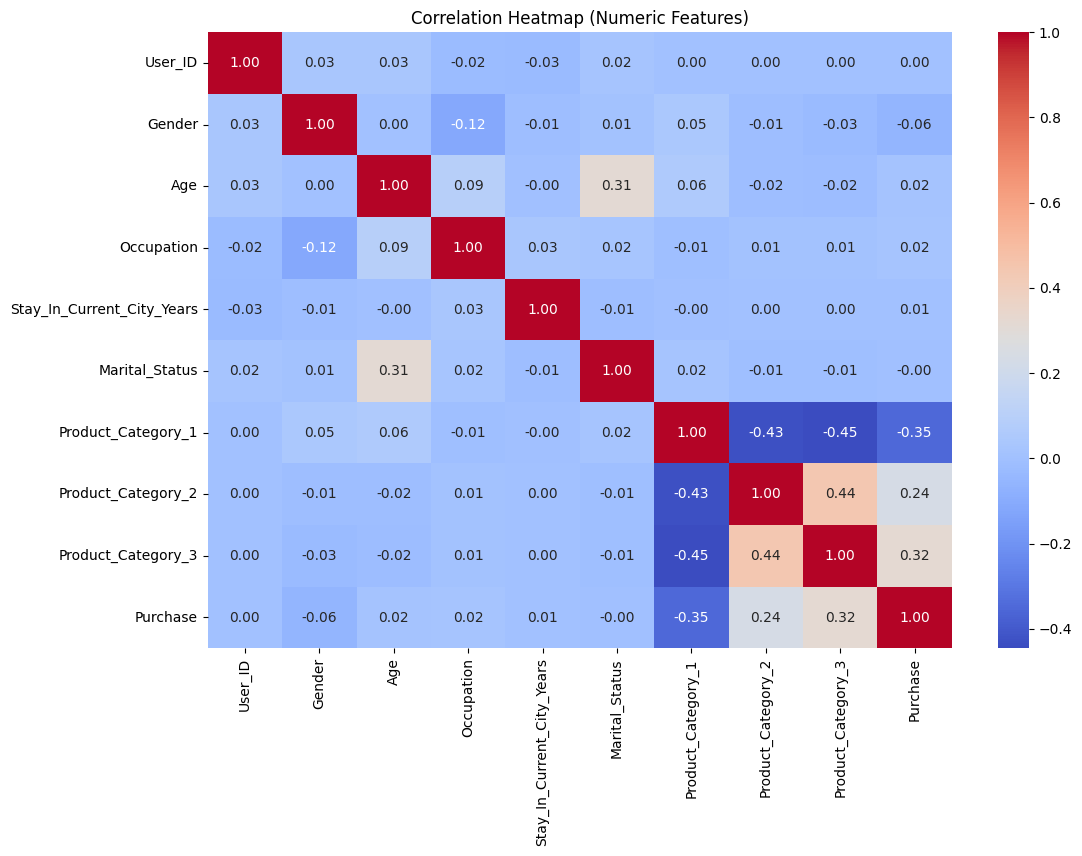


Correlation of features with Purchase:
Purchase                      1.000000
Product_Category_3            0.317013
Product_Category_2            0.235134
Occupation                    0.020833
Age                           0.015177
Stay_In_Current_City_Years    0.005492
User_ID                       0.004581
Marital_Status               -0.000662
Gender                       -0.060628
Product_Category_1           -0.349740
Name: Purchase, dtype: float64


In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Correlation with target Purchase
print("\nCorrelation of features with Purchase:")
print(corr_matrix['Purchase'].sort_values(ascending=False))


## Modal evaluation and selection

In [16]:
# Step 9: Train and Evaluate Models

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np

# Split train data
X = train_df.drop(['User_ID','Product_ID','Purchase'], axis=1)
y = train_df['Purchase']
X_test_final = test_df.drop(['User_ID','Product_ID','Comb'], axis=1, errors='ignore')

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

results = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)
results['Linear Regression'] = rmse(y_valid, y_pred_lr)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_valid)
results['Ridge'] = rmse(y_valid, y_pred_ridge)

# Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_valid)
results['Lasso'] = rmse(y_valid, y_pred_lasso)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)
results['Random Forest'] = rmse(y_valid, y_pred_rf)

# XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_valid)
results['XGBoost'] = rmse(y_valid, y_pred_xgb)

# Show results
print("Validation RMSE Scores:")
for model, score in results.items():
    print(f"{model}: {score:.2f}")


Validation RMSE Scores:
Linear Regression: 4561.83
Ridge: 4561.83
Lasso: 4561.83
Random Forest: 3045.20
XGBoost: 2859.41


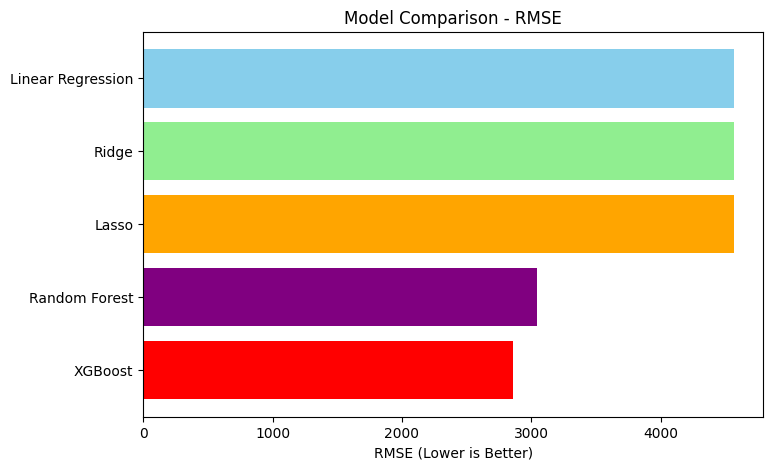

In [18]:
# Compare Model RMSE Scores

import matplotlib.pyplot as plt

# RMSE scores from previous results
model_names = list(results.keys())
rmse_scores = list(results.values())

plt.figure(figsize=(8,5))
plt.barh(model_names, rmse_scores, color=['skyblue','lightgreen','orange','purple','red'])
plt.xlabel("RMSE (Lower is Better)")
plt.title("Model Comparison - RMSE")
plt.gca().invert_yaxis()  # best model at top
plt.show()


##Plot XGBoost Feature Importance

<Figure size 1000x600 with 0 Axes>

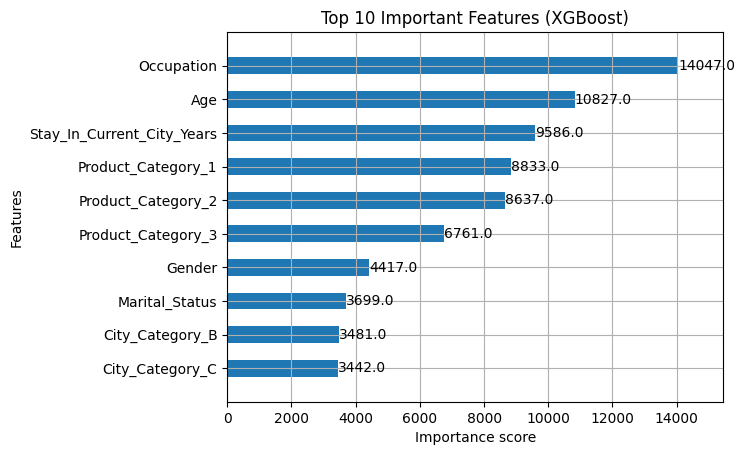

In [19]:

import matplotlib.pyplot as plt
import xgboost as xgb

# Train final XGBoost model again on all training data
xgb_final = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_final.fit(X, y)

# Plot feature importance
plt.figure(figsize=(10,6))
xgb.plot_importance(xgb_final, importance_type='weight', max_num_features=10, height=0.5)
plt.title("Top 10 Important Features (XGBoost)")
plt.show()


In [23]:

test_preds = xgb_final.predict(X_test_final)

# Add predictions back to original test dataframe
test_with_preds = test_df.copy()
test_with_preds["Predicted_Purchase"] = test_preds

# Select important features + prediction
cols_to_show = [
    "Age", "Occupation", 
    "Product_Category_1", "Product_Category_2", "Product_Category_3",
    "Predicted_Purchase"
]

# Show first 10 rows
test_with_preds[cols_to_show].head(10)


,Age,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Predicted_Purchase
0,4,-0.165072,-1.118912,0.681614,-0.659752,14959.472656
1,2,1.368046,-0.610809,0.668819,-0.659752,10730.625977
2,3,-1.084943,-0.102705,0.688012,-0.659752,6497.266602
3,3,-1.084943,-0.356757,0.677349,-0.659752,2542.253662
4,2,-1.084943,-0.356757,0.668819,1.514248,2832.454590
5,4,-1.084943,-0.864860,0.664553,1.520699,11198.009766
6,4,-1.084943,-1.118912,0.681614,1.520699,13182.476562
7,4,-1.084943,-0.864860,0.666686,1.507797,10899.228516
8,2,-0.165072,1.167553,0.685880,1.522849,17237.324219
9,1,1.061423,-0.102705,0.688012,-0.659752,5670.061035


In [29]:


# Predict on the full test set with final model
test_preds = xgb_final.predict(X_test_final)

# Load sample submission file
sample_sub = pd.read_csv(r"C:\Users\philp\Downloads\sample_submission_V9Inaty.csv")

# Fill in predictions
sample_sub['Purchase'] = test_preds

# Save to CSV
sample_sub.to_csv("submission.csv", index=False)

print("✅ submission.csv created successfully!")
sample_sub.head()


✅ submission.csv created successfully!


,Purchase,User_ID,Product_ID
0,14959.472656,1000004,P00128942
1,10730.625977,1000009,P00113442
2,6497.266602,1000010,P00288442
3,2542.253662,1000010,P00145342
4,2832.454590,1000011,P00053842


##XGBoost with new features

In [30]:
# Step 1: Create user-level features from train data
user_agg = train_df.groupby('User_ID')['Purchase'].agg(['mean','sum','count']).reset_index()

# Rename columns
user_agg.columns = ['User_ID','User_Avg_Purchase','User_Total_Purchase','User_Count']

# Step 2: Merge into train and test
train_df = train_df.merge(user_agg, on='User_ID', how='left')
test_df = test_df.merge(user_agg, on='User_ID', how='left')

print("Train shape after user features:", train_df.shape)
print("Test shape after user features:", test_df.shape)

# Quick preview
train_df[['User_ID','User_Avg_Purchase','User_Total_Purchase','User_Count']].head()


Train shape after user features: (550068, 16)
Test shape after user features: (233599, 16)


,User_ID,User_Avg_Purchase,User_Total_Purchase,User_Count
0,1000001,9545.514286,334093,35
1,1000001,9545.514286,334093,35
2,1000001,9545.514286,334093,35
3,1000001,9545.514286,334093,35
4,1000002,10525.610390,810472,77


In [31]:
# Step 2: Create product-level features
product_agg = train_df.groupby('Product_ID')['Purchase'].agg(['mean','sum','count']).reset_index()

# Rename columns
product_agg.columns = ['Product_ID','Product_Avg_Purchase','Product_Total_Purchase','Product_Count']

# Merge into train and test
train_df = train_df.merge(product_agg, on='Product_ID', how='left')
test_df = test_df.merge(product_agg, on='Product_ID', how='left')

print("Train shape after product features:", train_df.shape)
print("Test shape after product features:", test_df.shape)

# Quick preview
train_df[['Product_ID','Product_Avg_Purchase','Product_Total_Purchase','Product_Count']].head()


Train shape after product features: (550068, 19)
Test shape after product features: (233599, 19)


,Product_ID,Product_Avg_Purchase,Product_Total_Purchase,Product_Count
0,P00069042,11870.863436,2694686,227
1,P00248942,16304.030981,9472642,581
2,P00087842,1237.892157,126265,102
3,P00085442,1455.140762,496203,341
4,P00285442,7692.763547,1561631,203


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb

# Prepare train/test sets again
X = train_df.drop(['User_ID','Product_ID','Purchase'], axis=1)
y = train_df['Purchase']
X_test_final = test_df.drop(['User_ID','Product_ID','Comb'], axis=1, errors='ignore')

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost with new features
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE with user+product features:", rmse)


Validation RMSE with user+product features: 2437.3691759764256


In [38]:
# Step: Final XGBoost Model on Full Train Data
xgb_final = xgb.XGBRegressor(
    n_estimators=500,       # increase trees for more power
    learning_rate=0.05,     # lower learning rate for smoother fit
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train on full dataset (all rows, all new features)
xgb_final.fit(X, y)

# Predict on test data
test_preds = xgb_final.predict(X_test_final)

# Load sample submission file
sample_sub = pd.read_csv(r"C:\Users\philp\Downloads\sample_submission_V9Inaty.csv")

# Insert predictions (ensuring correct column order)
submission = sample_sub.copy()
submission['Purchase'] = test_preds
submission = submission[['User_ID', 'Product_ID', 'Purchase']]

# Save final file
submission.to_csv("finalsubmission.csv", index=False)

print("✅ Final submission.csv created successfully!")
submission.head()


✅ Final submission.csv created successfully!


,User_ID,Product_ID,Purchase
0,1000004,P00128942,16893.664062
1,1000009,P00113442,11505.142578
2,1000010,P00288442,6496.475586
3,1000010,P00145342,2482.049072
4,1000011,P00053842,2473.475830


In [39]:
import joblib

# Save model
joblib.dump(xgb_final, "xgb_model.pkl")
print("✅ Model saved as xgb_model.pkl")


✅ Model saved as xgb_model.pkl
